#**Final Project:**
Names: Esmeralda, Steven, Divya
##**Sypply Chain Data**
https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?resource=download
##**Goal**
To create a model that can accuratly predict whether or not a shipment will arive late or not.


# New section

#**Importing Packages and Data**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, precision_score, recall_score,
                             f1_score, make_scorer,
                             mean_squared_error, r2_score)

## Using GitHub Gist to make the code easily runnable for everyone

In [44]:
url = "https://gist.githubusercontent.com/divyadsouza/38ec814ea60971a912d0888a2fd08a3f/raw/18569dae05cbd774a4103602e4f2662e86e50496/DataCoSupplyChainDataset.csv"
df = pd.read_csv(url, encoding='latin1')

#**EDA**

In [45]:
#Display the top 5 rows
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [46]:
df.shape

(180519, 53)

In [47]:
#Dataframe dimensions and NA value investigation, variable data types, and list of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## Cleaning Obviously Redundant Information

In [48]:
columns_to_drop = ['Category Id', 'Category Name', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Id', 'Customer Segment', 'Customer Password', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name']

df_cleaned = df.drop(columns=columns_to_drop, axis=1)


#### Now, let's check what data we have left

In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer State                 180519 non-null  object 
 10  Customer Street                180519 non-null  object 
 11  Customer Zipcode               180516 non-null  float64
 12  Department Id                 

#### Creating a target variable and cleaning out data that we collectively decided won't give us meaningful information for the question we are exploring

In [50]:
df_cleaned['Delay'] = df_cleaned['Days for shipping (real)'] - df_cleaned['Days for shipment (scheduled)']
columns_to_drop = ['Days for shipping (real)','Days for shipment (scheduled)','Benefit per order','Delivery Status','Customer Street','Customer Zipcode','Market','Order Region','Product Status','Order Zipcode','Department Id']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, axis=1)

In [51]:
#Creating target variable - Late Arrival
  ## 1 = yes, the item arrived late to the customer
  ## 0 = no, the item arrived on time or beforetime
df_cleaned['Late Arrival'] = df_cleaned['Delay'].apply(lambda x: 1 if x > 0 else 0)

In [52]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        180519 non-null  object 
 1   Sales per customer          180519 non-null  float64
 2   Late_delivery_risk          180519 non-null  int64  
 3   Customer City               180519 non-null  object 
 4   Customer Country            180519 non-null  object 
 5   Customer State              180519 non-null  object 
 6   Department Name             180519 non-null  object 
 7   Latitude                    180519 non-null  float64
 8   Longitude                   180519 non-null  float64
 9   Order City                  180519 non-null  object 
 10  Order Country               180519 non-null  object 
 11  order date (DateOrders)     180519 non-null  object 
 12  Order Item Discount         180519 non-null  float64
 13  Order Item Dis

## Basic statistics of numeric variables


In [53]:
print(df_cleaned.describe())

       Sales per customer  Late_delivery_risk       Latitude      Longitude  \
count       180519.000000       180519.000000  180519.000000  180519.000000   
mean           183.107609            0.548291      29.719955     -84.915675   
std            120.043670            0.497664       9.813646      21.433241   
min              7.490000            0.000000     -33.937553    -158.025986   
25%            104.379997            0.000000      18.265432     -98.446312   
50%            163.990005            1.000000      33.144863     -76.847908   
75%            247.399994            1.000000      39.279617     -66.370583   
max           1939.989990            1.000000      48.781933     115.263077   

       Order Item Discount  Order Item Discount Rate  \
count        180519.000000             180519.000000   
mean             20.664741                  0.101668   
std              21.800901                  0.070415   
min               0.000000                  0.000000   
25%     

## Creating a pairplot to see if there are any visible correlations between delay and other numeric variables

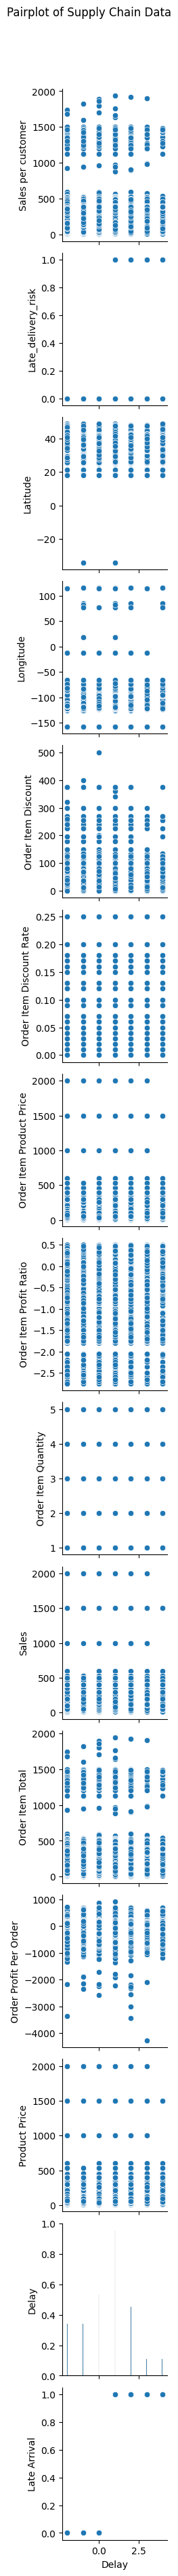

In [54]:
# Select only numeric columns for pairplot
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

# Exclude 'delay' column from the list of numeric columns to plot against it
numeric_cols_to_plot = [col for col in numeric_cols if col != 'delay']

# Create pairplots
sns.pairplot(data=df_cleaned, y_vars=numeric_cols_to_plot, x_vars=['Delay'], kind='scatter')
plt.suptitle('Pairplot of Supply Chain Data', y=1.02)
plt.show()


## Conclusion
No direct correlations visible with pairplot

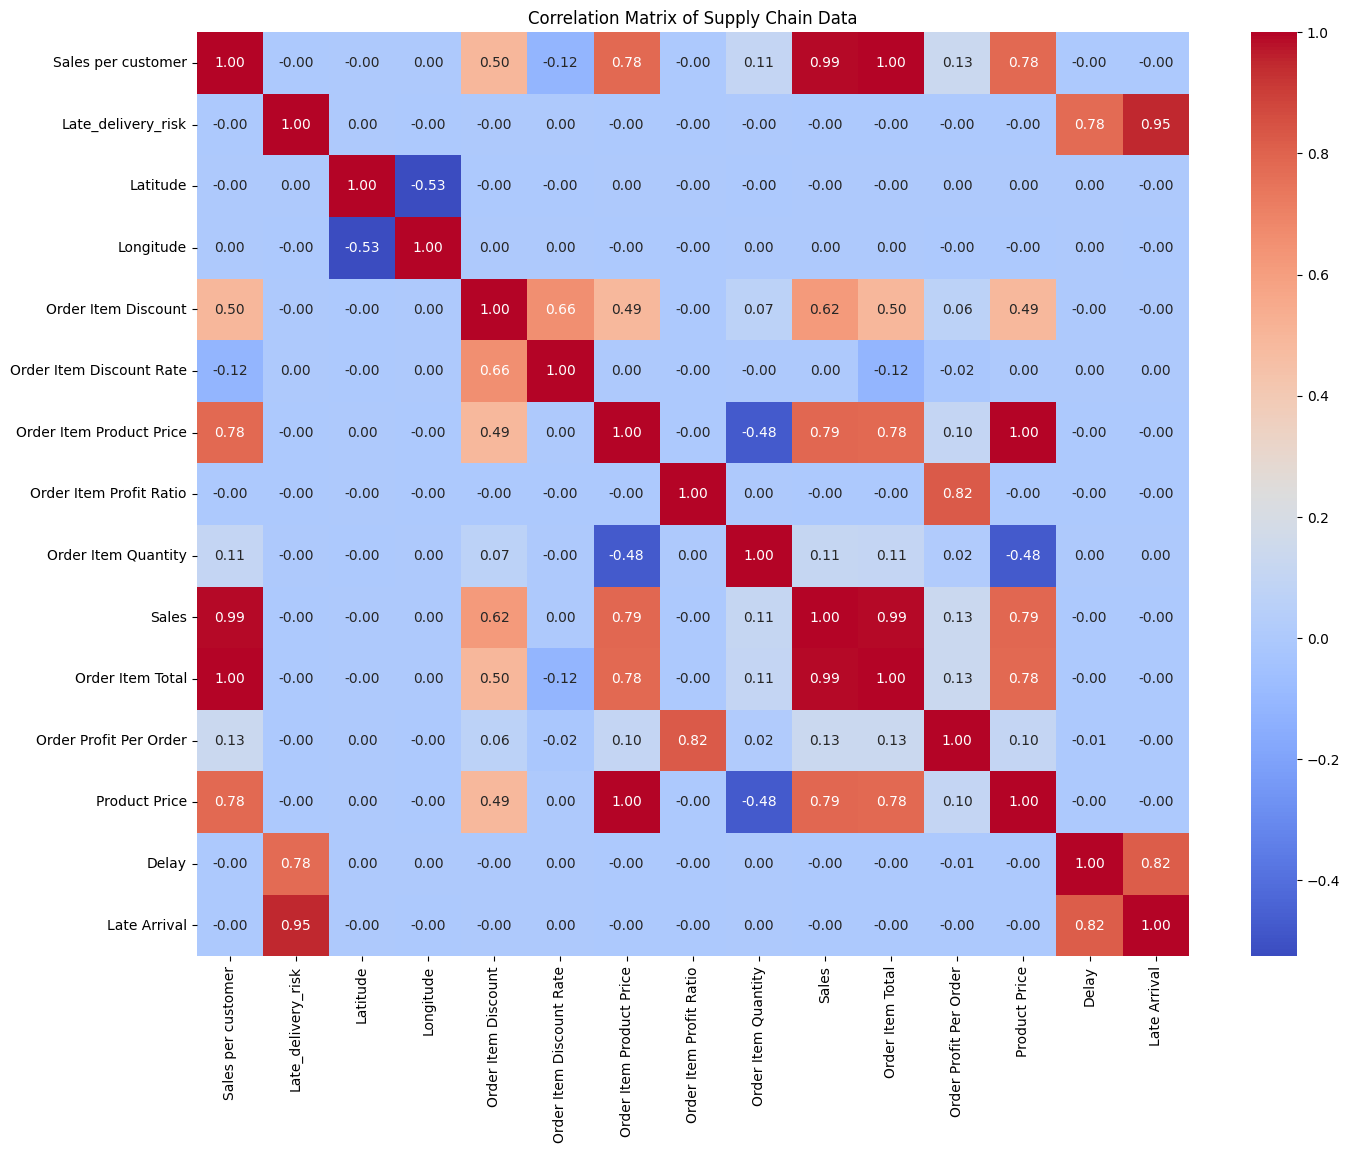

In [55]:
#Understanding the correlations in numeric varables
# Select only numerical columns
num_cols = df_cleaned.select_dtypes(include=['number']).columns
num_df = df_cleaned[num_cols]

# Calc Pearson correlation coefficient between all paris of columns in df
correlation_matrix = num_df.corr()

# Correlation heatmap among features
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Supply Chain Data")
plt.show()

## Conclusion:
We do notice any valid correlations between delay and other numeric variables. We should try encoding some data and then running models on them.

## Visualizing trends related to the delivery location

In [56]:
# Which countries are these deliveries made to?
df_cleaned['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [57]:
#Upon inspecton EE. UU. is linked to US cities. Since all deliveries were made to the US and Puerto Rico
#Therefore, delete any entries whose latitiudes/Longitudes are not in the US + Purteo rico range as these would be incorrect entries
df_cleaned = df_cleaned[(df_cleaned['Latitude'] >= 25) & (df_cleaned['Latitude'] <= 50) & (df_cleaned['Longitude'] >= -130) & (df_cleaned['Longitude'] <= -65)]


In [58]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110302 entries, 2 to 180516
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        110302 non-null  object 
 1   Sales per customer          110302 non-null  float64
 2   Late_delivery_risk          110302 non-null  int64  
 3   Customer City               110302 non-null  object 
 4   Customer Country            110302 non-null  object 
 5   Customer State              110302 non-null  object 
 6   Department Name             110302 non-null  object 
 7   Latitude                    110302 non-null  float64
 8   Longitude                   110302 non-null  float64
 9   Order City                  110302 non-null  object 
 10  Order Country               110302 non-null  object 
 11  order date (DateOrders)     110302 non-null  object 
 12  Order Item Discount         110302 non-null  float64
 13  Order Item Discount

In [59]:
# The data source tells us that senders had the ability to mark products with a late delivery risk, if the product was shipped late

# To analyse trends that are not related to senders explicitly stating that the product could arrive late,
# we created dataframe of everything that was delayed and not a late delivery risk

# We now have less noise in this dataframe
df_unexpected_delay = df_cleaned[(df_cleaned['Delay'] > 0) & (df_cleaned['Late_delivery_risk'] != 1)]


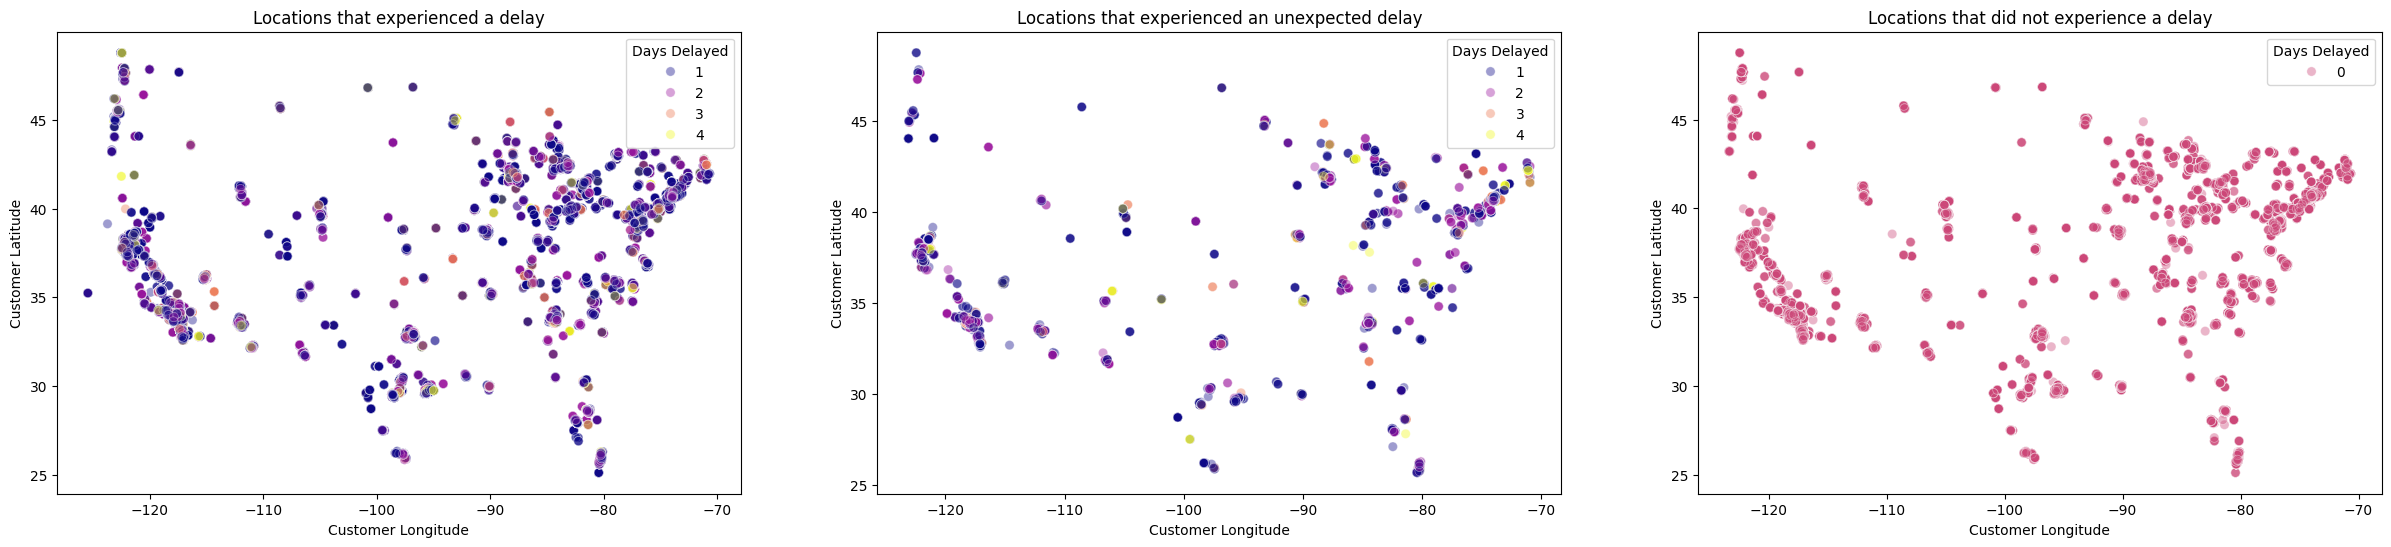

In [60]:
#Plotting the latitude vs longitude of addresses and coloring them by 'Delay' to visualize any delivery location specific correlations
plt.figure(figsize=(30, 6))
#Python libraries abd functions do not come to me intuitively
plt.subplot(1,3,1)
sns.scatterplot(data=df_cleaned[df_cleaned['Delay'] > 0], x='Longitude', y='Latitude', hue='Delay', palette='plasma', s=45, alpha=0.4)
plt.xlabel('Customer Longitude')
plt.ylabel('Customer Latitude')
plt.title('Locations that experienced a delay')
plt.legend(title='Days Delayed')

plt.subplot(1,3,2)
sns.scatterplot(data=df_unexpected_delay, x='Longitude', y='Latitude', hue='Delay', palette='plasma', s=45, alpha=0.4)
plt.xlabel('Customer Longitude')
plt.ylabel('Customer Latitude')
plt.title('Locations that experienced an unexpected delay')
plt.legend(title='Days Delayed')

plt.subplot(1,3,3)
sns.scatterplot(data=df_cleaned[df_cleaned['Delay'] == 0], x='Longitude', y='Latitude', hue='Delay', palette='plasma', s=45, alpha=0.4)
plt.xlabel('Customer Longitude')
plt.ylabel('Customer Latitude')
plt.title('Locations that did not experience a delay')
plt.legend(title='Days Delayed')
plt.show()

### Conclusion:
There are no apparent delivery location specific trends as locations that experienced some delay, have similar clustering to locations that did not experience a delay. Thus this gives more information of quantity of orders than information on delayed packages

## Encoding our data / Feature engineering

We now encode our data to run different prediction models on it



In [61]:
# Dropping customer city and state since there is no visual correlation and thus not worth encoding
df_cleaned = df_cleaned.drop(columns=['Customer City','Customer State'])

In [62]:
#Finding variables that would make sense to one-hot encode
print(df_cleaned['Department Name'].unique())
#Encode country but on a dataset that has been cleaned of countries with late deliveries
print(df_cleaned['Order Country'].unique())
print(df_cleaned['Shipping Mode'].unique())

['Fitness' 'Footwear' 'Apparel' 'Golf' 'Outdoors' 'Fan Shop' 'Book Shop'
 'Discs Shop' 'Pet Shop' 'Technology' 'Health and Beauty ']
['India' 'Australia' 'China' 'Indonesia' 'Singapur' 'Estados Unidos'
 'Canada' 'Madagascar' 'Argelia' 'Liberia' 'Sudán' 'Costa de Marfil'
 'Zambia' 'Marruecos' 'Egipto' 'Níger' 'SudAfrica' 'Nigeria' 'Mozambique'
 'Tanzania' 'Somalia' 'Ruanda' 'Turquía' 'Israel' 'Nueva Zelanda'
 'Bangladés' 'Tailandia' 'Irak' 'Arabia Saudí' 'Filipinas' 'Kazajistán'
 'Irán' 'Myanmar (Birmania)' 'Uzbekistán' 'Benín'
 'República Democrática del Congo' 'Camerún' 'Angola' 'Kenia' 'Togo'
 'Senegal' 'Francia' 'Ucrania' 'España' 'Alemania' 'Italia' 'Polonia'
 'Portugal' 'Reino Unido' 'Rumania' 'México' 'Colombia' 'Brasil'
 'República Dominicana' 'Trinidad y Tobago' 'Guatemala' 'Panamá'
 'Honduras' 'Venezuela' 'Cuba' 'El Salvador' 'Argentina' 'Afganistán'
 'Pakistán' 'Vietnam' 'Malasia' 'Ghana' 'Guinea' 'Etiopía' 'Países Bajos'
 'Rusia' 'Bélgica' 'Finlandia' 'Bulgaria' 'Austria' 'J

## NOTE:
#### After we ran our models the first time, we realised that there were no correlations between shipping locations and incorrect delivery dates. Encoding shipping origin information adds a lot of columns to our data and we don't want to completely rule out shipping origins as an influencing factor. It may be more insightful to analyze this same data as two separate dataframes, one that prioritizes shipping origin statistics and one that looks into all other information but shipping origin stats

In [63]:
df_locations_cleaned = df_cleaned[
    [
        'Customer Country',
        'Order City',
        'Order Country',
        'Order State',
        'Late Arrival'
    ]
].copy()
df_encoded=df_cleaned.drop(columns=['Order City','Order Country','Order State'])

### Questions we are investigating:
- Are there specific product departments that are underperforming?
- Does the shipping mode have a correlation with late deliveries?



In [64]:
#encode categorical variables to get information on correlations
df_encoded = pd.get_dummies(df_encoded, columns=['Department Name','Shipping Mode'], drop_first=False)


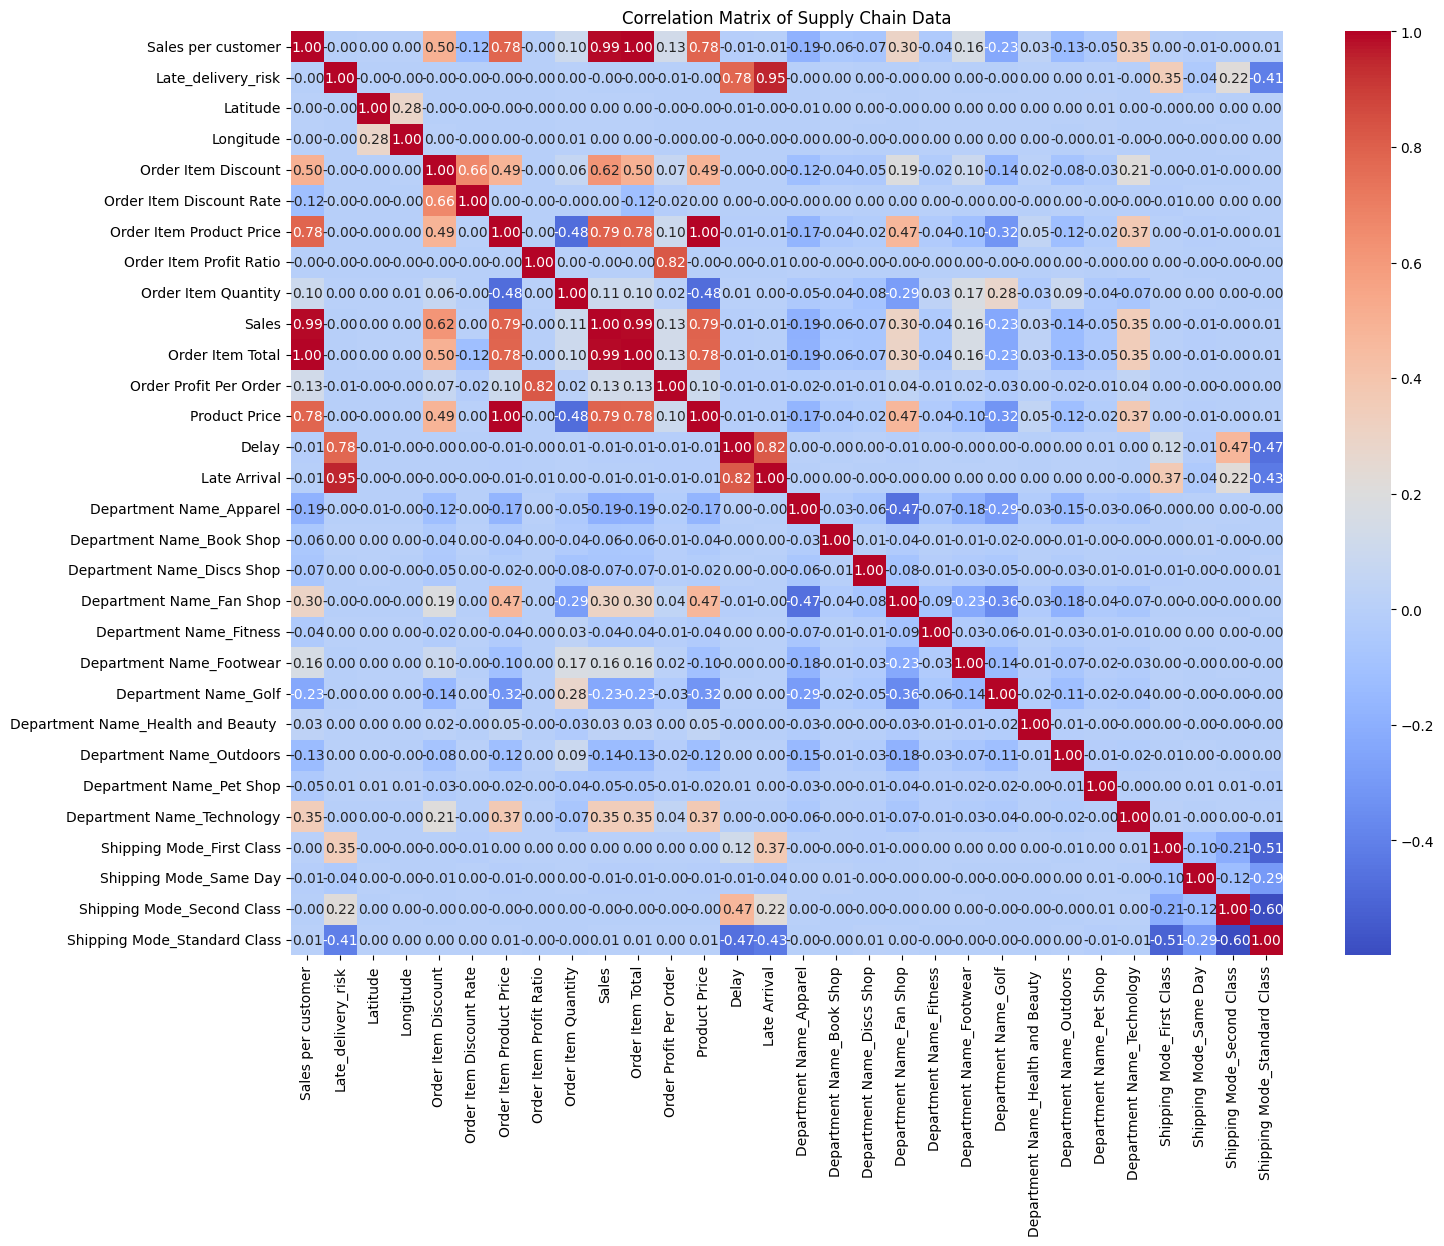

In [65]:
#Understanding the correlations in numeric varables
# Select only numerical columns
num_cols = df_encoded.select_dtypes(include=['number','boolean']).columns
num_df = df_encoded[num_cols]

# Calc Pearson correlation coefficient between all paris of columns in df
correlation_matrix = num_df.corr()

# Correlation heatmap among features
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Supply Chain Data")
plt.show()

### Conclusion:
We can notice some correlaion between late deliveries and Shipping modes: Second class and Standard class.
Second Class shipments seem to be much more likely to be delayed than Standard Class shippments
Standard Class shipments seem to have a negative correlation with delay which tells us that they are least likely to be delayed, even over Same Day deliveries

### Questions we are investigating:
- Is there a correlation between the receiver's country and late delivery?
- Are packages that originate from specific countries/cities more prone to late deliveries?
- Is there a correlation between the month the order was placed and delivery time?
- Does the time of the day the order was placed impact delivery time?
- Does the time of the month impact delivery time?

In [66]:
df_encoded = pd.get_dummies(df_encoded, columns=['Customer Country'], drop_first=False)
df_locations_encoded = pd.get_dummies(df_locations_cleaned, columns=['Customer Country','Order State','Order Country','Order City'], drop_first=False)

In [67]:
# Are there any other features we should consider encoding?
df_encoded.select_dtypes(include=['object']).columns.to_list()

['Type',
 'order date (DateOrders)',
 'Order Status',
 'shipping date (DateOrders)']

In [68]:
df_locations_encoded.select_dtypes(include=['object']).columns.to_list()

[]

In [69]:
#Convert current object type to date type
df_encoded['order date (DateOrders)'] = pd.to_datetime(df_encoded['order date (DateOrders)'])
df_encoded['shipping date (DateOrders)'] = pd.to_datetime(df_encoded['shipping date (DateOrders)'])


In [70]:
# Create new columns for date and time for both order and shipping dates
df_encoded['order_date'] = df_encoded['order date (DateOrders)'].dt.date
df_encoded['order_time'] = df_encoded['order date (DateOrders)'].dt.time

df_encoded['shipping_date'] = df_encoded['shipping date (DateOrders)'].dt.date
df_encoded['shipping_time'] = df_encoded['shipping date (DateOrders)'].dt.time

df_encoded['shipping_time'].head()

,shipping_time
2,12:06:00
3,11:45:00
5,11:03:00
7,10:21:00
9,09:39:00


In [71]:
#Feature Enginering Order and Shipping Date  --
#already created above#df_encoded['order_year'] = df_encoded['order date (DateOrders)'].dt.year
df_encoded['order_year'] = df_encoded['order date (DateOrders)'].dt.year
df_encoded['order_month'] = df_encoded['order date (DateOrders)'].dt.month
df_encoded['order_day'] = df_encoded['order date (DateOrders)'].dt.day
df_encoded['order_hour'] = df_encoded['order date (DateOrders)'].dt.hour
df_encoded['order_minute'] = df_encoded['order date (DateOrders)'].dt.minute

df_encoded['shipping_year'] = df_encoded['shipping date (DateOrders)'].dt.year
df_encoded['shipping_month'] = df_encoded['shipping date (DateOrders)'].dt.month
df_encoded['shipping_day'] = df_encoded['shipping date (DateOrders)'].dt.day
df_encoded['shipping_hour'] = df_encoded['shipping date (DateOrders)'].dt.hour
df_encoded['shipping_minute'] = df_encoded['shipping date (DateOrders)'].dt.minute

In [72]:
#Dropping Order and Shipping Date items that can not go into models
df_encoded = df_encoded.drop(columns=[
    'order date (DateOrders)', 'shipping date (DateOrders)',
    'order_date', 'order_time', 'shipping_date', 'shipping_time'
])

In [73]:
# are there any Object data types left?
df_encoded.select_dtypes(include=['object']).columns.to_list()

['Type', 'Order Status']

In [74]:
# Let's encode order state
print(df_encoded['Order Status'].unique())
print(df_encoded['Type'].unique())

['CLOSED' 'COMPLETE' 'CANCELED' 'PROCESSING' 'PENDING' 'PENDING_PAYMENT'
 'SUSPECTED_FRAUD' 'ON_HOLD' 'PAYMENT_REVIEW']
['CASH' 'DEBIT' 'TRANSFER' 'PAYMENT']


In [75]:
# Let's drop Type and encode the others
df_encoded = df_encoded.drop(columns=['Type'])
df_encoded = pd.get_dummies(df_encoded, columns=['Order Status'], drop_first=False)


In [76]:
# Since we developed our target variable using this we will need to remove it from our models
df_encoded = df_encoded.drop(columns=['Delay'])
# Remove late_delivery_risk
# Since it is kind of cheating in our model if we keep this since this is what we are trying to make a model to be able to predict
df_encoded = df_encoded.drop(columns=['Late_delivery_risk'])

In [77]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110302 entries, 2 to 180516
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Sales per customer                  110302 non-null  float64
 1   Latitude                            110302 non-null  float64
 2   Longitude                           110302 non-null  float64
 3   Order Item Discount                 110302 non-null  float64
 4   Order Item Discount Rate            110302 non-null  float64
 5   Order Item Product Price            110302 non-null  float64
 6   Order Item Profit Ratio             110302 non-null  float64
 7   Order Item Quantity                 110302 non-null  int64  
 8   Sales                               110302 non-null  float64
 9   Order Item Total                    110302 non-null  float64
 10  Order Profit Per Order              110302 non-null  float64
 11  Product Price                  

In [78]:
df_locations_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110302 entries, 2 to 180516
Columns: 4622 entries, Late Arrival to Order City_Ústí nad Labem
dtypes: bool(4621), int64(1)
memory usage: 487.8 MB


Late Arrival      0      1
order_year                
2015          16342  21916
2016          16463  22110
2017          13763  18403
2018            531    774


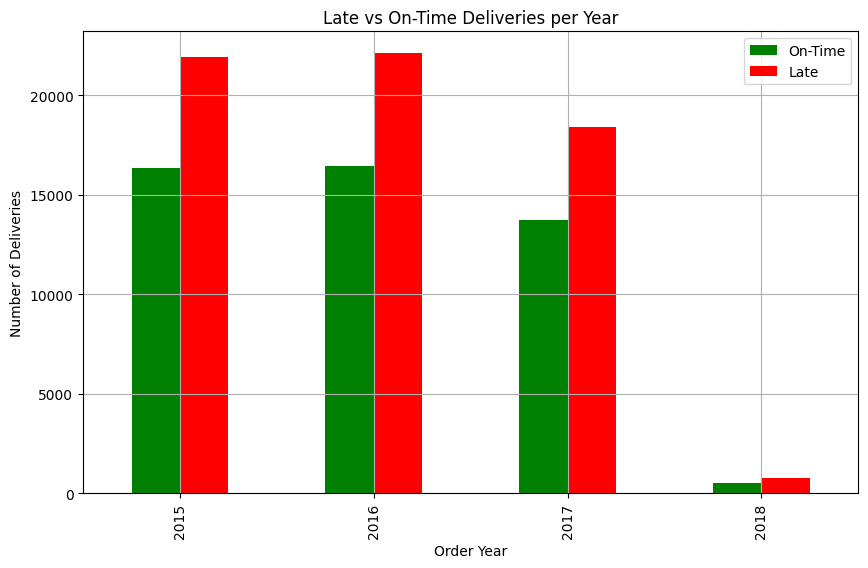

In [79]:
#Count of Late Arrivals per Year

# Group by year and Late Arrival to then count
arrival_status_counts = df_encoded.groupby(['order_year', 'Late Arrival']).size().unstack()
print(arrival_status_counts)
# Graph
arrival_status_counts.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Late vs On-Time Deliveries per Year')
plt.xlabel('Order Year')
plt.ylabel('Number of Deliveries')
plt.legend(['On-Time', 'Late'])
plt.grid(True)
plt.show()

### Conclusion:
There seem to significantly more late deliveries than deliveries that arrived when they said they would. Thus indicating a possibility to optimize delivery estimations

## PCA for EDA

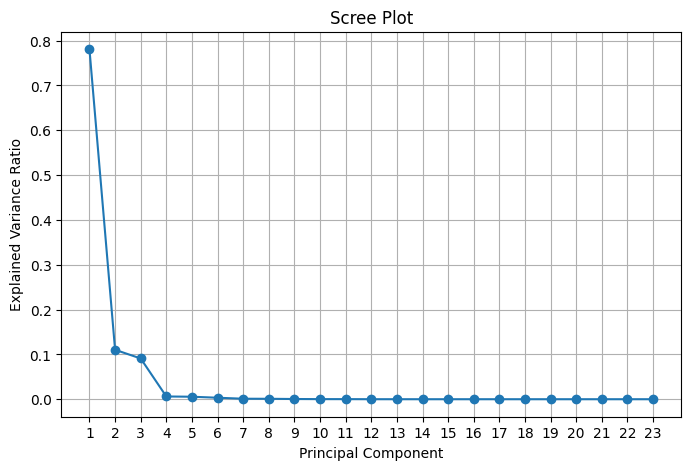

In [80]:
#PCA analysis to see which variables we truly do need?????????
pca = PCA()
#pca fit only numeric cols
#Dropping obviously correlated variables before PCA
pca.fit(df_encoded.select_dtypes(include=np.number).dropna())

#pca.fit(df_encoded.groupby('Number'))
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

In [81]:
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]
pc3_variance = explained_variance[2]

print(f"PC1 Explained Variance: {pc1_variance:.4f}")
print(f"PC2 Explained Variance: {pc2_variance:.4f}")
print(f"PC3 Explained Variance: {pc3_variance:.4f}")

PC1 Explained Variance: 0.7808
PC2 Explained Variance: 0.1103
PC3 Explained Variance: 0.0909


In [82]:
loadings_df = pd.DataFrame({
    'Feature': df_encoded.select_dtypes(include=np.number).dropna().columns,
    'PC1 Loadings': pca.components_[0],
    'PC2 Loadings': pca.components_[1],
    'PC3 Loadings': pca.components_[2]
})
print("\nFeature Loadings for PC1 and PC2:")
print(loadings_df)


Feature Loadings for PC1 and PC2:
                     Feature  PC1 Loadings  PC2 Loadings  PC3 Loadings
0         Sales per customer      0.413449      0.061523     -0.376111
1                   Latitude      0.000002     -0.000067     -0.000195
2                  Longitude      0.000108     -0.000267     -0.000980
3        Order Item Discount      0.043058      0.001022     -0.015848
4   Order Item Discount Rate     -0.000010     -0.000023      0.000081
5   Order Item Product Price      0.471650     -0.140415      0.507469
6    Order Item Profit Ratio      0.000027      0.003617      0.000981
7        Order Item Quantity     -0.000872      0.003062     -0.013397
8                      Sales      0.456506      0.062545     -0.391959
9           Order Item Total      0.413449      0.061523     -0.376111
10    Order Profit Per Order      0.054390      0.974198      0.219011
11             Product Price      0.471650     -0.140415      0.507469
12              Late Arrival     -0.000011

### Conclusion
> We don't like PCA for this data

## Creating splits in our dataframes
> For both dataframes, df_encoded and df_location_encodes, we'll split our data into 2 parts of 60% and 40%.
> * We'll use the 60% data to then:
>> * create train-test splits(or cross validation)
>> * tune hyperparameters
>> * Analyze feature importance

> We'll then use the 40% to evaluate the best model we picked and see how it performs with the selected hyperparameters. And then evaluate performance metrics to determine the best model and report the most important features.


### Extracting our target variable from the split dataframe

# Do locations really play an important role or is it just noise?
### Using Logistic regression to analyze - whether the location products were stipped from really convey meaningful information

In [99]:
# Split the features and target
X_locations_40 = df_encoded.drop(columns=["Late Arrival"])
y = df_encoded["Late Arrival"]

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [101]:
#Fitting pipe to model
pipe.fit(X_locations_40, y)

clf = pipe.named_steps['clf']

coefs = clf.coef_[0]

feat_imp = pd.Series(coefs, index=X_locations_40.columns)

# 4) Sort to see negative → positive
feat_imp = feat_imp.sort_values()

Top 20 positive associations:
The most positive coefficients at the bottom of feat_imp.tail(20) are the features that push the model toward predicting Late Arrival = 1.
Order Status_PROCESSING       -0.000224
Department Name_Fitness        0.000479
Department Name_Pet Shop       0.000595
Department Name_Footwear       0.001599
Department Name_Book Shop      0.003040
Order Status_CANCELED          0.003119
Customer Country_EE. UU.       0.004964
Order Item Discount Rate       0.005222
Department Name_Discs Shop     0.006246
Department Name_Outdoors       0.009031
Order Status_COMPLETE          0.014951
Order Status_PENDING           0.015163
Product Price                  0.018522
Order Item Product Price       0.018522
Order Item Quantity            0.025645
shipping_day                   1.693734
Shipping Mode_First Class      2.315079
order_hour                     6.291101
shipping_month                20.269531
shipping_year                 59.044941
dtype: float64


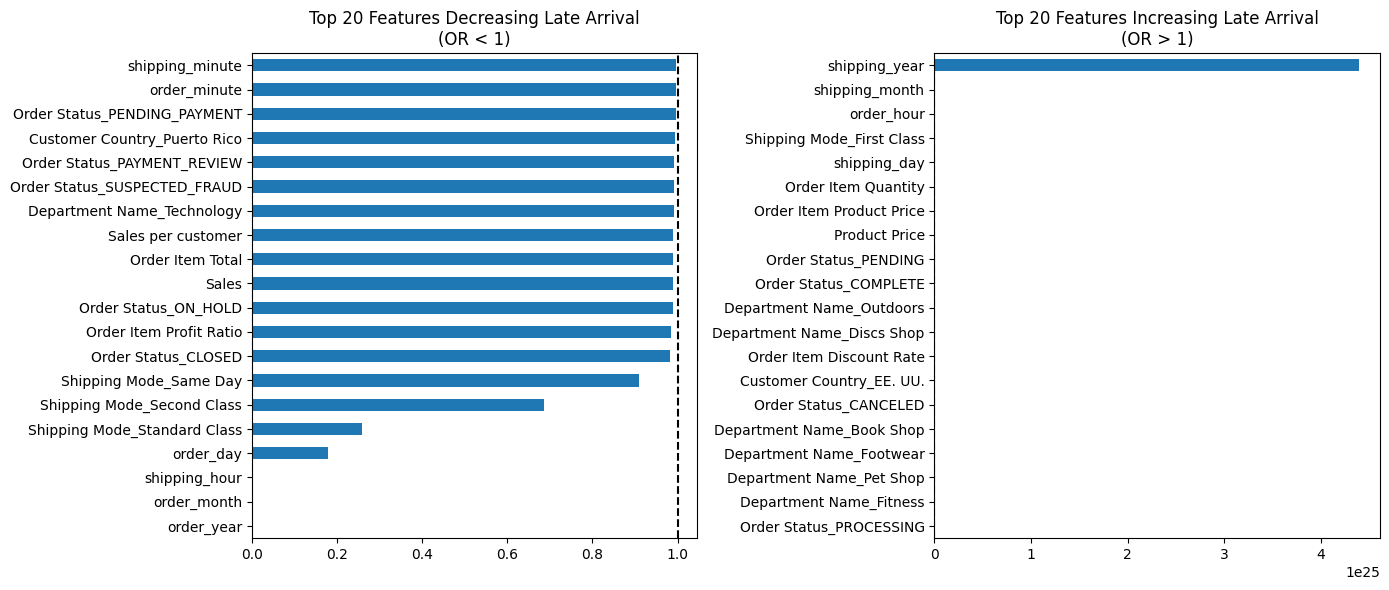

In [102]:
# Visualizing our results
from sklearn.inspection import PartialDependenceDisplay

clf = pipe.named_steps['clf']
coefs = pd.Series(clf.coef_[0], index=X_locations_40.columns)
feat_imp = pd.Series(clf.coef_[0], index=X_locations_40.columns).sort_values()

print("Top 20 positive associations:")
print("The most positive coefficients at the bottom of feat_imp.tail(20) are the features that push the model toward predicting Late Arrival = 1.")
print(feat_imp.tail(20))

odds = np.exp(coefs)
odds_sorted = odds.sort_values()

n_display = 20
fig, axes = plt.subplots(1,2, figsize=(14,6))

odds_sorted.head(n_display).plot.barh(ax=axes[0])
axes[0].set_title(f"Top {n_display} Features Decreasing Late Arrival\n(OR < 1)")
axes[0].axvline(1, color='k', linestyle='--')

odds_sorted.tail(n_display).plot.barh(ax=axes[1])
axes[1].set_title(f"Top {n_display} Features Increasing Late Arrival\n(OR > 1)")
axes[1].axvline(1, color='k', linestyle='--')

plt.tight_layout()
plt.show()


### Conclusion:
While there seem to be regions that contribute to late deliveries more, this graph tells us that analyzing order shipment locations may not be the most informative

### Creating train - test splits

In [104]:
#Splitting data
X = df_encoded.drop(columns=["Late Arrival"])
y = df_encoded["Late Arrival"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

#**Model Training**

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, precision_score, recall_score,
                             f1_score, make_scorer,
                             mean_squared_error, r2_score)

In [106]:
# Define hyperparameter grid for CART classifier
import warnings
warnings.filterwarnings(
    'ignore',
    message='One or more of the test scores are non-finite'
)
param_grid = {
    'max_depth': [None, 4, 12, 24],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,10,20],
    'max_features': [None, 'sqrt', 'log2']
}
f1_scorer = make_scorer(f1_score, zero_division=0)
strat_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Grid search with 5‐fold CV, optimizing F1 score
grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=strat_cv,
    scoring=f1_scorer,
    n_jobs=-1, #Multithreadddd, because we love it!

)
grid.fit(X_train, y_train)

best_clf = grid.best_estimator_

# Predict on test set
y_pred = best_clf.predict(X_test)

# Compute metrics
rmse      = np.sqrt(mean_squared_error(y_test, y_pred))
r2        = r2_score(y_test, y_pred)
conf_mat  = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

In [107]:
# Display results
print("Best hyperparameters:", grid.best_params_)
print(f"RMSE:  {rmse:.4f}")
print(f"R²:    {r2:.4f}\n")

print("Confusion Matrix:")
print(conf_mat, "\n")

print("Classification Report:")
print(class_rep)

# Feature importances
importances = pd.Series(
    best_clf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)
print("Feature importances:")
print(importances.head(10))

Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE:  0.1286
R²:    0.9324

Confusion Matrix:
[[ 9242   178]
 [  187 12454]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9420
           1       0.99      0.99      0.99     12641

    accuracy                           0.98     22061
   macro avg       0.98      0.98      0.98     22061
weighted avg       0.98      0.98      0.98     22061

Feature importances:
order_day                       0.362428
shipping_day                    0.246588
Shipping Mode_Standard Class    0.184280
order_hour                      0.062528
Shipping Mode_Same Day          0.030497
Latitude                        0.017297
Shipping Mode_First Class       0.015049
Longitude                       0.013567
order_month                     0.011689
shipping_month                  0.009405
dtype: float64


In [108]:
print("CART results on the larger test data")
y_pred = best_clf.predict(X_train)
# Compute metrics
rmse      = np.sqrt(mean_squared_error(y_train, y_pred))
r2        = r2_score(y_train, y_pred)
conf_mat  = confusion_matrix(y_train, y_pred)
class_rep = classification_report(y_train, y_pred)
# Display results
print("Best hyperparameters:", grid.best_params_)
print(f"RMSE:  {rmse:.4f}")
print(f"R²:    {r2:.4f}\n")

print("Confusion Matrix:")
print(conf_mat, "\n")

print("Classification Report:")
print(class_rep)

CART results on the larger test data
Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE:  0.0000
R²:    1.0000

Confusion Matrix:
[[37679     0]
 [    0 50562]] 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37679
           1       1.00      1.00      1.00     50562

    accuracy                           1.00     88241
   macro avg       1.00      1.00      1.00     88241
weighted avg       1.00      1.00      1.00     88241



Best hyperparameters CART: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


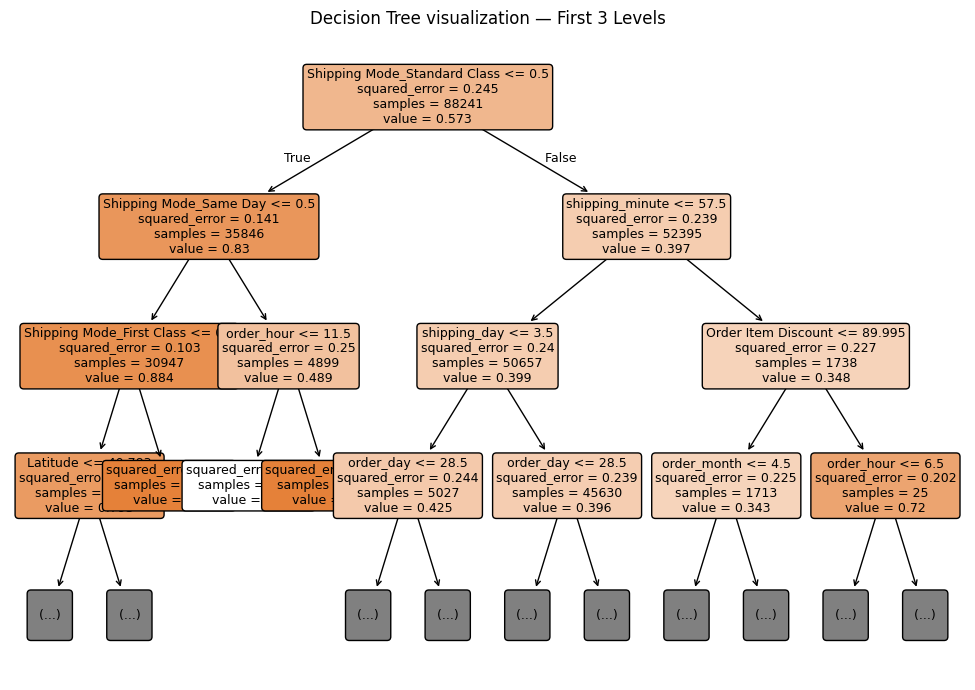

In [109]:
#Regression tree visualization
plt.figure(figsize=(10, 7))
plot_tree(
    best_clf,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize = 9
)
plt.title("Decision Tree visualization — First 3 Levels")
plt.tight_layout()
plt.show()

In [110]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [111]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler and fit on training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test) ##I don't remember if these needs to be moved

In [112]:
# Check for NaNs
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())
mask_train = ~np.isnan(X_train_scaled).any(axis=1)
X_train_scaled = X_train_scaled[mask_train]
y_train = y_train[mask_train]

mask_test = ~np.isnan(X_test_scaled).any(axis=1)
X_test_scaled = X_test_scaled[mask_test]
y_test = y_test[mask_test]


NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0


In [113]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)


# Train (fit) the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Evaluate on the training set and test set
train_acc = knn.score(X_train_scaled, y_train)
test_acc = knn.score(X_test_scaled, y_test)
print(f"K=5 Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

K=5 Train Accuracy: 0.809, Test Accuracy: 0.700


In [114]:
#Using cross validation to find the best  value for k to input as a hyperperamiter
from sklearn.model_selection import cross_val_score

# Try K from 1 to 15 and record cross-validation accuracy (using 5-fold CV)
cv_scores = []
neighbors = range(4, 20)
for k in neighbors:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation on training data
    scores = cross_val_score(knn_k, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Print the scores
for k, acc in zip(neighbors, cv_scores):
    print(f"K={k}, Mean CV Accuracy={acc:.3f}")

K=4, Mean CV Accuracy=0.699
K=5, Mean CV Accuracy=0.700
K=6, Mean CV Accuracy=0.704
K=7, Mean CV Accuracy=0.703
K=8, Mean CV Accuracy=0.707
K=9, Mean CV Accuracy=0.705
K=10, Mean CV Accuracy=0.710
K=11, Mean CV Accuracy=0.708
K=12, Mean CV Accuracy=0.710
K=13, Mean CV Accuracy=0.708
K=14, Mean CV Accuracy=0.711
K=15, Mean CV Accuracy=0.709
K=16, Mean CV Accuracy=0.712
K=17, Mean CV Accuracy=0.710
K=18, Mean CV Accuracy=0.713
K=19, Mean CV Accuracy=0.712


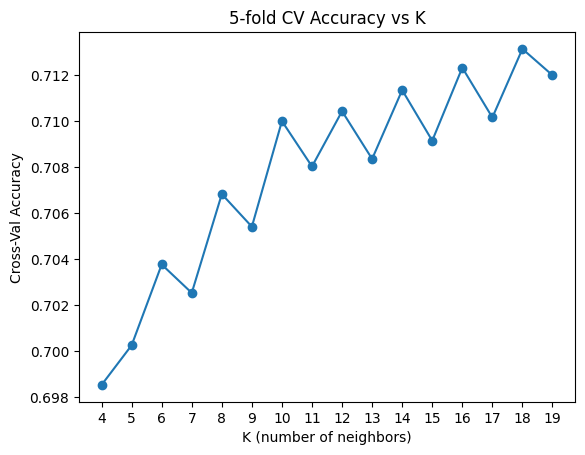

In [115]:
plt.plot(neighbors, cv_scores, marker='o')
plt.xlabel('K (number of neighbors)')
plt.ylabel('Cross-Val Accuracy')
plt.title('5-fold CV Accuracy vs K')
plt.xticks(range(4,20))
plt.show()

In [116]:
#Selected the k value we deamed as being best for the dataset
best_k = 16
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_knn = knn_best.predict(X_test_scaled)
test_acc = knn_best.score(X_test_scaled, y_test)
print(f"Best K = {best_k}, Test Accuracy = {test_acc:.3f}")

Best K = 16, Test Accuracy = 0.713


In [117]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# Initialize and train the logistic regression model

# Check for NaNs
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())
mask_train = ~np.isnan(X_train_scaled).any(axis=1)
X_train_scaled = X_train_scaled[mask_train]
y_train = y_train[mask_train]

mask_test = ~np.isnan(X_test_scaled).any(axis=1)
X_test_scaled = X_test_scaled[mask_test]
y_test = y_test[mask_test]
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0


LogisticRegression(random_state=42)

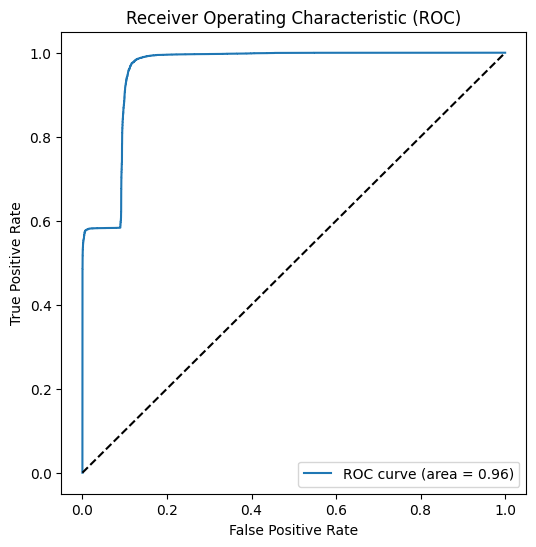

In [118]:
# Get predicted probabilities for the positive class
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [119]:
from sklearn.ensemble import AdaBoostRegressor
# Train sklearn AdaBoost
ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
ada.fit(X_train_scaled, y_train)

y_pred_ada = ada.predict(X_test_scaled)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada  = r2_score(y_test, y_pred_ada)

print(f"AdaBoost → RMSE: {np.sqrt(mse_ada):.3f},  R²: {r2_ada:.3f}")

AdaBoost → RMSE: 0.447,  R²: 0.185


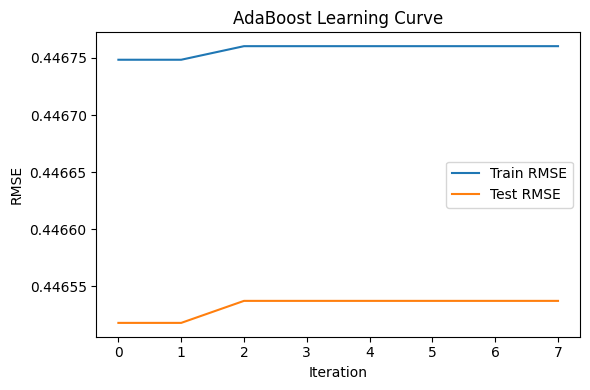

In [120]:
# Plot train/test error per iteration
train_err, test_err = [], []
for y_train_pred in ada.staged_predict(X_train_scaled):
    train_err.append(mean_squared_error(y_train, y_train_pred))
for y_test_pred in ada.staged_predict(X_test_scaled):
    test_err .append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(6,4))
plt.plot(np.sqrt(train_err), label="Train RMSE")
plt.plot(np.sqrt(test_err),  label="Test RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.title("AdaBoost Learning Curve")
plt.tight_layout()
plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (
    HalvingRandomSearchCV,
    StratifiedKFold
)


=== RandomForest ===
Accuracy: 0.875
Confusion Matrix:
[[ 8641   779]
 [ 1972 10669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9420
           1       0.93      0.84      0.89     12641

    accuracy                           0.88     22061
   macro avg       0.87      0.88      0.87     22061
weighted avg       0.88      0.88      0.88     22061


=== GradientBoosting ===
Accuracy: 0.954
Confusion Matrix:
[[ 8459   961]
 [   63 12578]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      9420
           1       0.93      1.00      0.96     12641

    accuracy                           0.95     22061
   macro avg       0.96      0.95      0.95     22061
weighted avg       0.96      0.95      0.95     22061


=== Logistic Regression ===
Accuracy: 0.738
Confusion Matrix:
[[8559  861]
 [4930 7711]]
Classification Report:
         

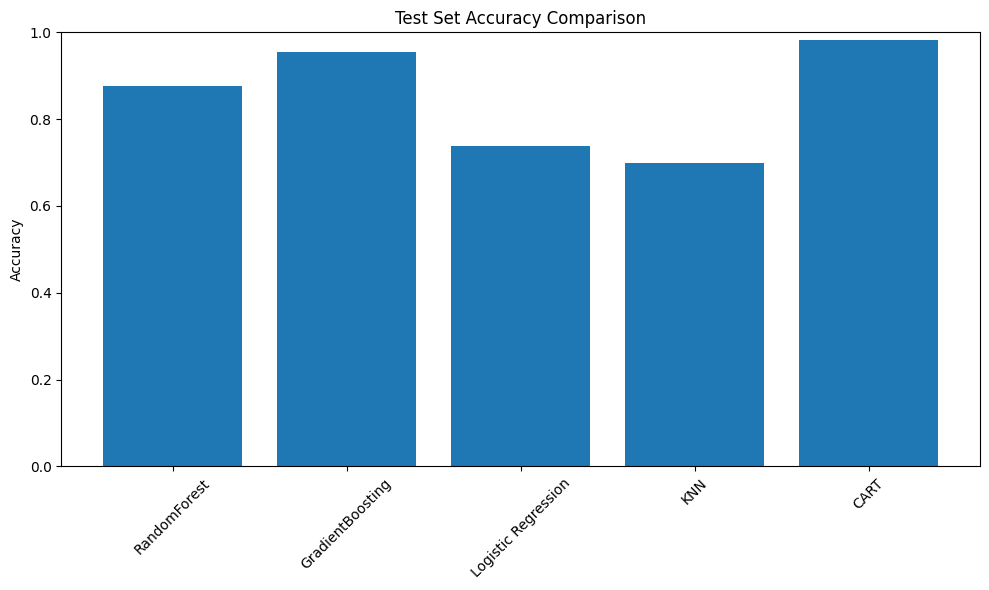

In [122]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'CART': DecisionTreeClassifier(random_state=42)
}

results = {}

for name, mdl in models.items():
    print(f"\n=== {name} ===")
    mdl.fit(X_train_scaled, y_train)
    y_pred = mdl.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.3f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.ylim(0, 1)
plt.title("Test Set Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [130]:
# 1. Random Forest #Does work just might take forever
param_grid_rf = {
    'n_estimators': [25, 35, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5], ##
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                     param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [129]:
# 2. Gradient Boosting
param_grid_gb = {
    'n_estimators': [25, 30, 35], #I added 50
    'learning_rate': [0.05, 0.1]
    #'max_depth': [3, 5],
    #'min_samples_split': [2, 5], ##
    #'min_samples_leaf': [1, 2],
}
gs_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                     param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
gs_gb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [25, 30, 35]},
             scoring='accuracy')

In [128]:
# 4. K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7], #looking at cross valuation above, 7 seemed to be the better k than 10
    'weights': ['uniform', 'distance']
}
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
gs_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [126]:
# 5. Logistic Regression
param_grid_logr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
gs_logr = GridSearchCV(LogisticRegression(max_iter=1000),
                       param_grid_logr, cv=5, scoring='accuracy', n_jobs=-1)
gs_logr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [127]:
# 6. CART (Decision Tree)
param_grid_cart = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], ##
    'criterion': ['gini', 'entropy'],
}
gs_cart = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_cart, cv=5, scoring='accuracy', n_jobs=-1)
gs_cart.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
#EVALUATING BEST MODELS
# Collect best estimators
best_rf = gs_rf.best_estimator_
best_gb = gs_gb.best_estimator_
best_knn = gs_knn.best_estimator_
best_logr = gs_logr.best_estimator_
best_cart = grid.best_estimator_

# Add all tuned models
models_tuned = {
    'RF_tuned': best_rf,
    'GB_tuned': best_gb,
    'KNN_tuned': best_knn,
    'LogR_tuned': best_logr,
    'CART_tuned': best_cart
}

# Evaluate on test set
tuned_results = {}
for name, mdl in models_tuned.items():
    X_eval = X_test_scaled if 'KNN' in name or 'LogR' in name else X_test
    preds = mdl.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print()
    tuned_results[name] = acc

# tuned_results = {}

# for name, mdl in models_tuned.items():
#     mdl.fit(X_train_scaled, y_train)
#     y_pred = mdl.predict(X_test_scaled)

#     acc = accuracy_score(y_test, y_pred)
#     results[name] = acc
#     print(f"{name} Accuracy: {acc:.3f}")

#     # Confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     print("Confusion Matrix:")
#     print(cm)

#     # Classification report
#     report = classification_report(y_test, y_pred)
#     print("Classification Report:")
#     print(report)

# Bar chart of tuned model accuracy
plt.figure(figsize=(6, 4))
plt.bar(tuned_results.keys(), tuned_results.values())
plt.ylim(0, 1)
plt.title("Tuned Model Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Visualizing the top 10 most important features produced by best random forest and GradientBoosting Models

# All models with feature importance ranking capabilities
models_tuned_fi = {
    'RF_tuned': best_rf,
    'GB_tuned': best_gb,
    #'KNN_tuned': best_knn, #Does not have feature importance ability
    #'LogR_tuned': best_logr, #Does not have feature importance ability
    'CART_tuned': best_cart
}
for name, mdl in models_tuned_fi.items():
    imp = mdl.feature_importances_
    idx = np.argsort(imp)[::-1][:10]
    top_feats = X_train.columns[idx]

    plt.figure(figsize=(6,4))
    plt.title(f"{name} – Top 10 Features")
    plt.bar(range(len(idx)), imp[idx])
    plt.xticks(range(len(idx)), top_feats, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()